C:\Users\DELL 5520\AppData\Local\Temp\ipykernel_16352\548767630.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["month_year"] = pd.Categorical(filtered_df["month_year"], categories=date_order, ordered=True)


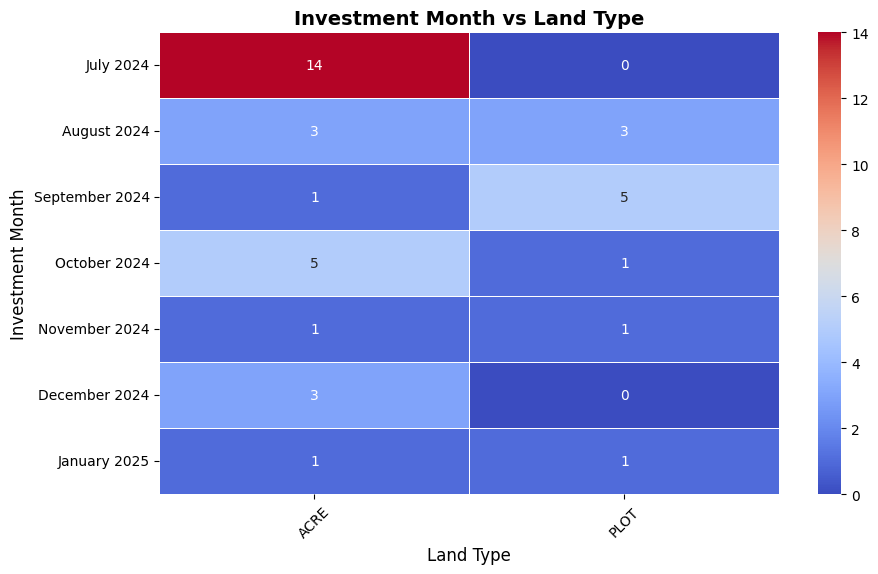

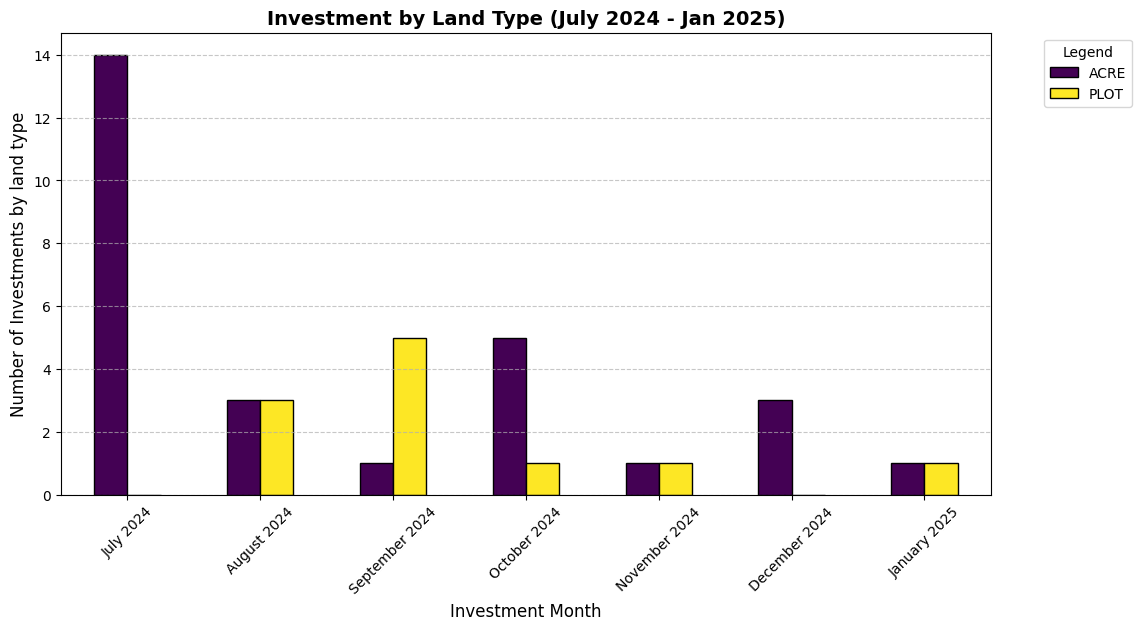

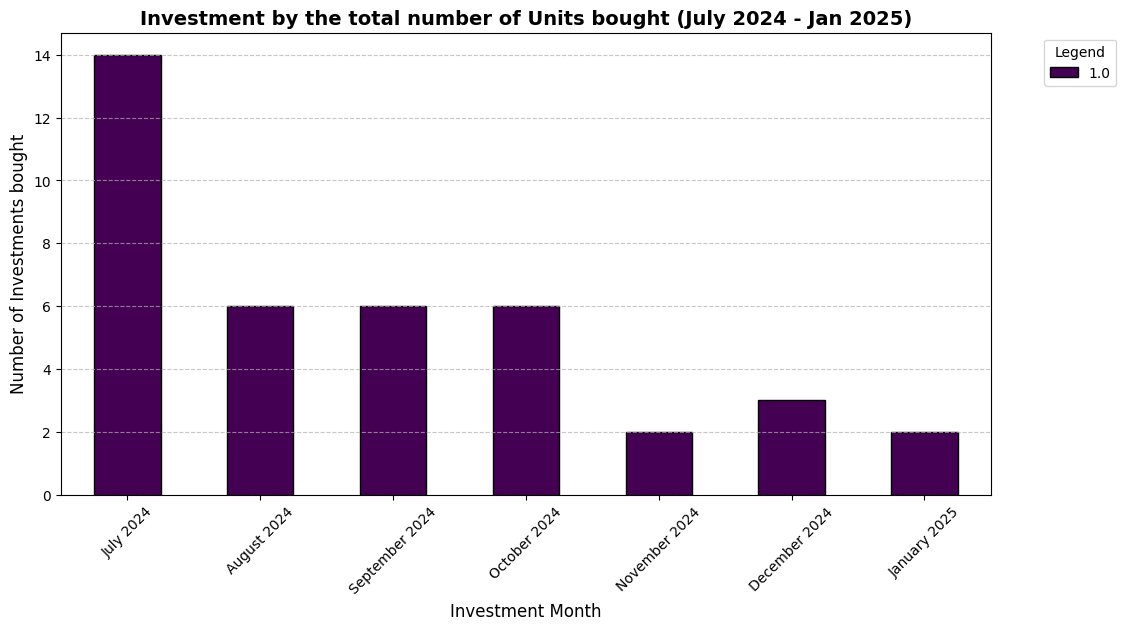

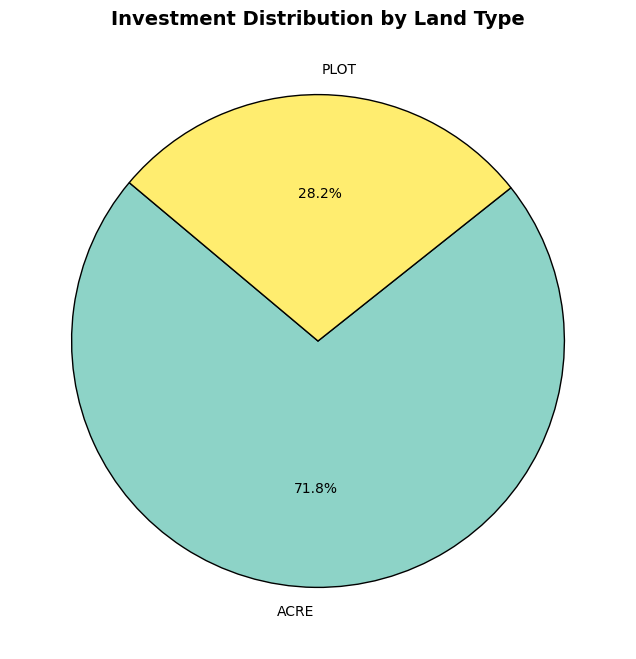

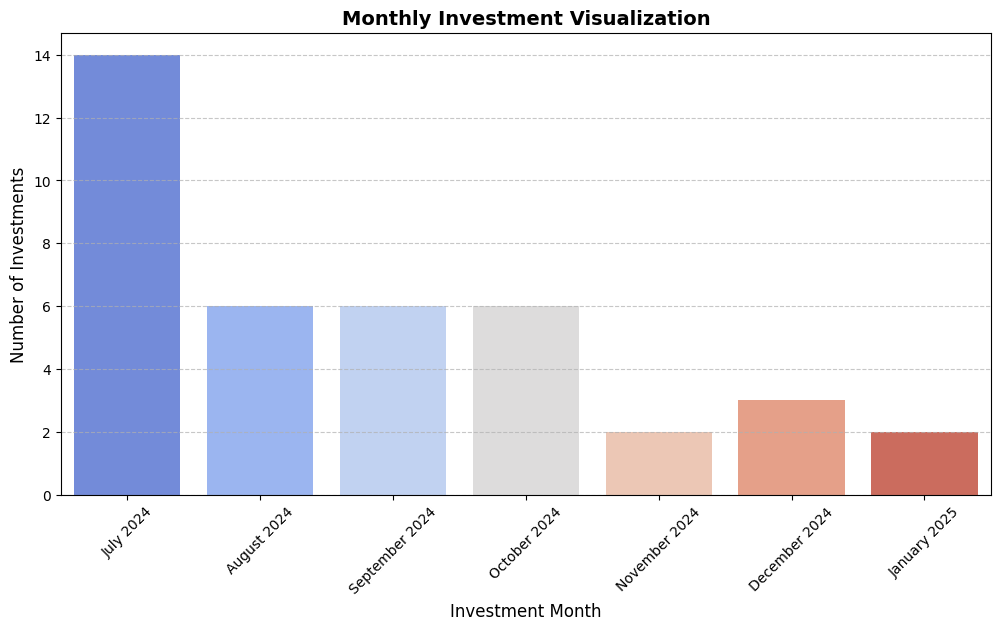

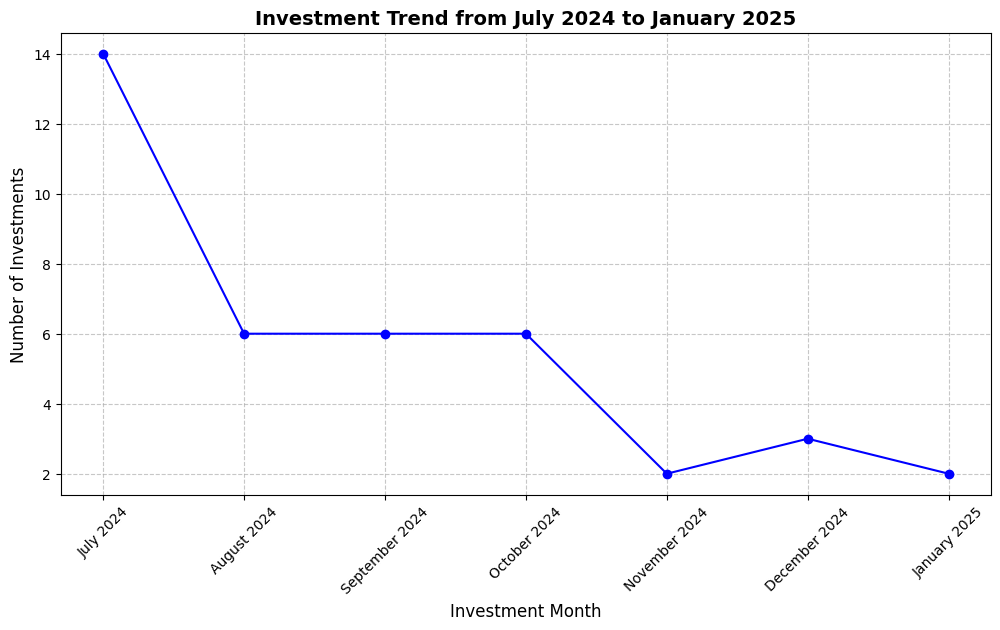

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = "ROYAL PALM RECEIPT & PORTFOLIO (2).xlsx"
xls = pd.ExcelFile(file_path)

# Load the 'PORTFOLIO' sheet
df_portfolio = pd.read_excel(xls, sheet_name="PORTFOLIO")

# Standardize column names
df_portfolio.columns = df_portfolio.columns.str.lower().str.replace(" ", "_")

# Convert investment_year to numeric
df_portfolio["investment_year"] = pd.to_numeric(df_portfolio["investment_year"], errors="coerce")

# Define target months and years
target_months = {"JULY": 2024, "AUGUST": 2024,"SEPTEMBER": 2024, "OCTOBER": 2024, "NOVEMBER": 2024, "DECEMBER": 2024, "JANUARY": 2025}

# Ensure 'investment_month' is a string and handle NaN values
df_portfolio["investment_month"] = df_portfolio["investment_month"].astype(str).str.upper()

# Create 'month_year' column with proper formatting
df_portfolio["month_year"] = df_portfolio.apply(
    lambda row: f"{row['investment_month'].capitalize()} {int(row['investment_year'])}" 
    if row["investment_month"] in target_months else None, axis=1
)

# Filter dataset
filtered_df = df_portfolio[df_portfolio["month_year"].notna()]

# Ensure the order of months
date_order = ["July 2024", "August 2024","September 2024", "October 2024", "November 2024", "December 2024", "January 2025"]
filtered_df["month_year"] = pd.Categorical(filtered_df["month_year"], categories=date_order, ordered=True)

# Group data by Land and Investment Month
land_group = filtered_df.groupby(["month_year", "land"]).size().unstack()

# Group data by Unit and Investment Month
unit_group = filtered_df.groupby(["month_year", "unit"]).size().unstack()

# Cross-tabulation
cross_land = pd.crosstab(filtered_df["month_year"], filtered_df["land"])


# Function to plot heatmap
def plot_heatmap(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Function to plot bar chart
def plot_bar_chart(data, title, xlabel, ylabel):
    data.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to plot pie chart
def plot_pie_chart(data, title):
    data.sum().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colormap="Set3", startangle=140, wedgeprops={'edgecolor': 'black'})
    plt.title(title, fontsize=14, fontweight="bold")
    plt.ylabel("")
    plt.show()

# Function to plot monthly investment barplot
def plot_monthly_investment(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="month_year", palette="coolwarm", hue="month_year", legend=False, order=date_order)
    plt.title("Monthly Investment Visualization", fontsize=14, fontweight="bold")
    plt.xlabel("Investment Month", fontsize=12)
    plt.ylabel("Number of Investments", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Line Chart - Investment Trend Over Time
def plot_trend_line(df):
    trend_data = df.groupby("month_year").size().reindex(date_order, fill_value=0)
    plt.figure(figsize=(12, 6))
    plt.plot(trend_data.index, trend_data.values, marker="o", linestyle="-", color="b")
    plt.title("Investment Trend from July 2024 to January 2025", fontsize=14, fontweight="bold")
    plt.xlabel("Investment Month", fontsize=12)
    plt.ylabel("Number of Investments", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()

# Plot all visualizations
plot_heatmap(cross_land, "Investment Month vs Land Type", "Land Type", "Investment Month")
plot_bar_chart(land_group, "Investment by Land Type (July 2024 - Jan 2025)", "Investment Month", "Number of Investments by land type")
plot_bar_chart(unit_group, "Investment by the total number of Units bought (July 2024 - Jan 2025)", "Investment Month", "Number of Investments bought")
plot_pie_chart(land_group, "Investment Distribution by Land Type")
plot_monthly_investment(filtered_df)
plot_trend_line(filtered_df)